# Eigenvectors and Eigenvalues

In this notebook I will run through an example of finding an eigen-decomposition. Throughout I will provide geometric interpretation of eigenvalues and eigenvectors

Before diving in, some background on eigen decomposition.

Supppose we have matrix $A$, its eigen equation is given by
$$\textbf{Av = $\lambda$ v}$$

where $\textbf{v}$ is a matrix whose columns are composed of the set of eigenvectos $\{v_{1}, v_{2}, ..., v_{m}\}$ (the value of m occurs from the algebraic multiplicity of the set of eigenvectors), $\lambda$ is the set of eigenvalues associated with each eigenvector

In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 0]])

First lets plot the original unit vectors in the canonical basis and observe how they are transformed by $\textbf{A}$

In [5]:
X, Y, Z = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])

As explained in the notebook, transforming a space by matrix $A$ can be seen as transforming the unitvectors

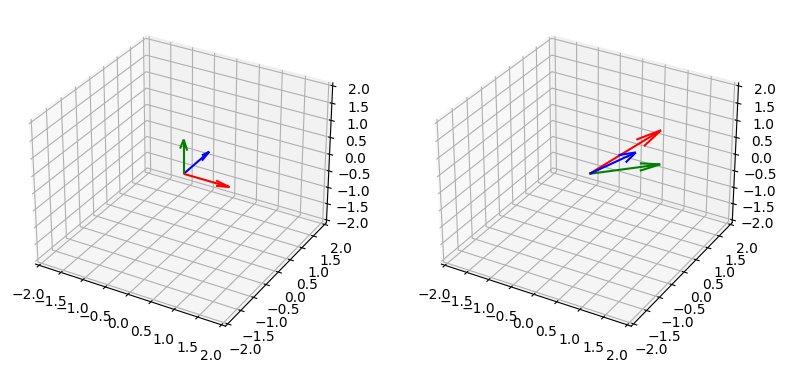

In [9]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
lims = 2
ax.quiver(0, 0, 0, *X, color="r")
ax.quiver(0, 0, 0, *Y, color="b")
ax.quiver(0, 0, 0, *Z, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)

ax = fig.add_subplot(1, 2, 2, projection="3d")

ax.quiver(0, 0, 0, *(A @ X), color="r")
ax.quiver(0, 0, 0, *(A @ Y), color="b")
ax.quiver(0, 0, 0, *(A @ Z), color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
plt.show()

Here, we can see that our transformation $A$ has adjusted our basis vectors.

The eigen-decomposition for an equation is given by 
$$A= PDP^{-1}$$

where P is a matrix whose columns are the eigenvectors of $A$ and $D$ is a diagonal matrix whose non-zero values are the eigenvalues of $A$. For a derivation of this equation see *mathematics for machine learning ref*

Let's unpick exactly what the eigen-decomposition equation is saying. We can see that our transformation $A$ is equivalent to the three transformations on the RHS.

These transformations are $P$, whose columns are the set of eigenvectos, $D$ a diagonal matrix and $P^{-1}$ the inverse of the eigenvector matrix.

To understand geometrically we are required to be familiar with a basis change. For details on this please see the basis change notebook.



To follow the above example we will apply our eigen-decomposition to the three standard basis vectors $X, Y, Z$

In [8]:
eig_vals, eig_vecs = np.linalg.eig(A)
eig_vals, eig_vecs

(array([ 2.41421356, -0.41421356, -1.        ]),
 array([[ 7.07106781e-01,  7.07106781e-01, -1.57009246e-16],
        [ 5.00000000e-01, -5.00000000e-01, -7.07106781e-01],
        [ 5.00000000e-01, -5.00000000e-01,  7.07106781e-01]]))

In [12]:
P, P_inv, D = eig_vecs, np.linalg.inv(eig_vecs), np.diag(eig_vals)

First we will apply our transformation $P$. Remember this is a matrix whose columns are the eigenvectors of $A$

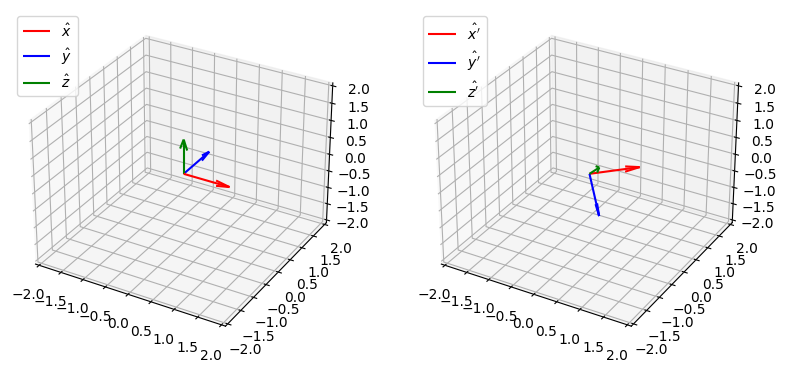

In [15]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")

ax.quiver(0, 0, 0, *X, color="r", label=r"$\hat{x}$")
ax.quiver(0, 0, 0, *Y, color="b", label=r"$\hat{y}$")
ax.quiver(0, 0, 0, *Z, color="g", label=r"$\hat{z}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.legend(loc="upper left")

ax = fig.add_subplot(1, 2, 2, projection="3d")

ax.quiver(0, 0, 0, *(P_inv @ X), color="r", label=r"$\hat{x'}$")
ax.quiver(0, 0, 0, *(P_inv @ Y), color="b", label=r"$\hat{y'}$")
ax.quiver(0, 0, 0, *(P_inv @ Z), color="g", label=r"$\hat{z'}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.legend(loc="upper left")

plt.show()

At this point we wish to talk in terms of our new basis vectors $\{\hat{x'}, \hat{y'}, \hat{z'}\}$. We describe all vectors with respect to these basis vectors. If ever we wish to refer to a vector with respect to the standard basis, we must transform our basis vectors back to $\{\hat{x}, \hat{y}, \hat{z}\}$.

We will also switch to a view according to the primed basis $\{x', y', z' \}$. In this view the vectors in the right hand above plot will appear as below. This is explained within the basis change notebook.


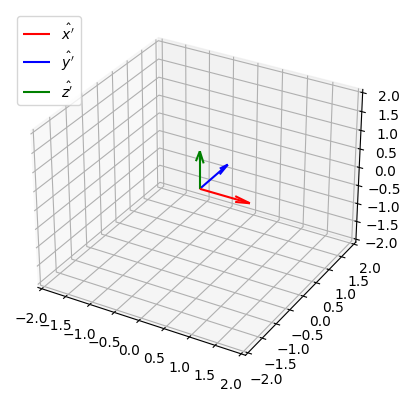

In [24]:
X_prime = np.array([1, 0, 0])
Y_prime = np.array([0, 1, 0])
Z_prime = np.array([0, 0, 1])

lims = 2
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.quiver(0, 0, 0, *X_prime, color="r", label=r"$\hat{x'}$")
ax.quiver(0, 0, 0, *Y_prime, color="b", label=r"$\hat{y'}$")
ax.quiver(0, 0, 0, *Z_prime, color="g", label=r"$\hat{z'}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.legend(loc="upper left")
plt.show()

Next we will apply the diagonal matrix populated with our eigenvalues, $D$. We will do this wrt to our new basis.



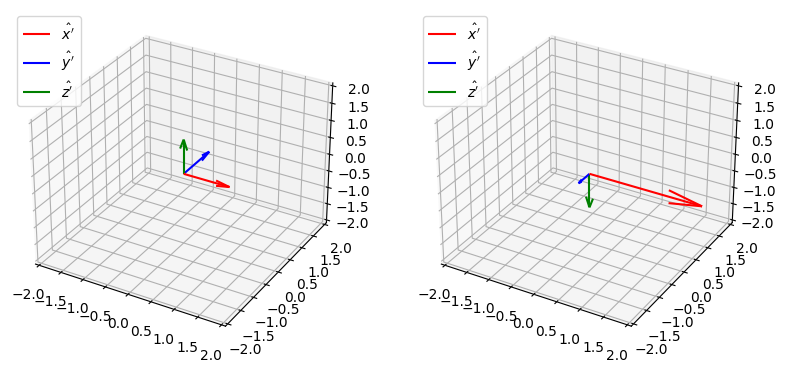

In [29]:
fig = plt.figure(figsize=plt.figaspect(0.5))


ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *X_prime, color="r", label=r"$\hat{x'}$")
ax.quiver(0, 0, 0, *Y_prime, color="b", label=r"$\hat{y'}$")
ax.quiver(0, 0, 0, *Z_prime, color="g", label=r"$\hat{z'}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.legend(loc="upper left")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *(D @ X_prime), color="r", label=r"$\hat{x'}$")
ax.quiver(0, 0, 0, *(D @ Y_prime), color="b", label=r"$\hat{y'}$")
ax.quiver(0, 0, 0, *(D @ Z_prime), color="g", label=r"$\hat{z'}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.legend(loc="upper left")

plt.show()

This is an important result/realisation. So far we have applied $DP$ to our original space. The $P$ transformation acted as a change of basis. Afterwards the $D$ (diagonal) transform didn't change the direction of these basis vectors, only stretched/squished them. This should be kept in mind before we apply the final step.

Finally we will apply $P^{-1}$, the inverse transformation of $P$ which acted as our basis change in 

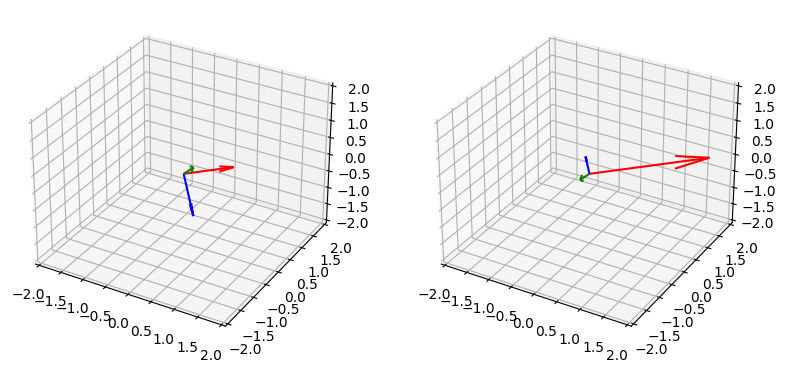

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *(P_inv @ X), color="r")
ax.quiver(0, 0, 0, *(P_inv @ Y), color="b")
ax.quiver(0, 0, 0, *(P_inv @ Z), color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *(P_inv @ D @ X), color="r")
ax.quiver(0, 0, 0, *(P_inv @ D @ Y), color="b")
ax.quiver(0, 0, 0, *(P_inv @ D @ Z), color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)

plt.show()

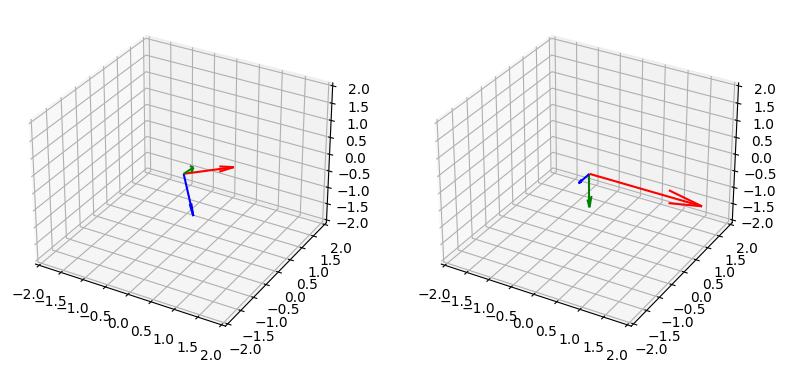

In [30]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *(P_inv @ X), color="r")
ax.quiver(0, 0, 0, *(P_inv @ Y), color="b")
ax.quiver(0, 0, 0, *(P_inv @ Z), color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *(P @ P_inv @ D @ X), color="r")
ax.quiver(0, 0, 0, *(P @ P_inv @ D @ Y), color="b")
ax.quiver(0, 0, 0, *(P @ P_inv @ D @ Z), color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)

plt.show()

## References